In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OneHotEncoder, RareLabelEncoder
import statsmodels.api as sm

In [2]:
df = pd.read_csv("debt_database.csv")
df.head()

,country,iso3c,BorrowerType,BorrowerAgency,CreditorName,CreditorName_short,CreditorGroup,CreditorAgency,CreditorAgencyType,year,quarter,Amount_musd,interest,structure,maturity,grace,source
0,Algeria,DZA,NaN,Government of Algeria,World Bank (IBRD),WB-IBRD,Multilateral,IBRD,Multilateral development bank,2000.0,Q3,83.0,NaN,FSL,16.000000,2.750000,World Bank
1,Algeria,DZA,NaN,NaN,African Development Bank,AfDB,Multilateral,AfDB Ordinary Capital,NaN,2000.0,Q4,117.0,NaN,NaN,20.000000,5.000000,OECD
2,Algeria,DZA,NaN,NaN,Islamic Development Bank,IsDB,Multilateral,Islamic Development Bank,NaN,2000.0,Q4,87.0,NaN,NaN,NaN,NaN,OECD
3,Algeria,DZA,NaN,Government of Algeria,World Bank (IBRD),WB-IBRD,Multilateral,IBRD,Multilateral development bank,2000.0,Q4,5.0,NaN,FSL,13.480769,3.692308,World Bank
4,Algeria,DZA,NaN,Government of Algeria,World Bank (IBRD),WB-IBRD,Multilateral,IBRD,Multilateral development bank,2000.0,Q4,9.0,NaN,FSL,14.000000,3.711539,World Bank


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             7498 non-null   object 
 1   iso3c               7498 non-null   object 
 2   BorrowerType        1410 non-null   object 
 3   BorrowerAgency      5298 non-null   object 
 4   CreditorName        7493 non-null   object 
 5   CreditorName_short  7494 non-null   object 
 6   CreditorGroup       7493 non-null   object 
 7   CreditorAgency      7493 non-null   object 
 8   CreditorAgencyType  3769 non-null   object 
 9   year                7498 non-null   float64
 10  quarter             6147 non-null   object 
 11  Amount_musd         7499 non-null   float64
 12  interest            5607 non-null   float64
 13  structure           2887 non-null   object 
 14  maturity            5625 non-null   float64
 15  grace               5411 non-null   float64
 16  source

In [4]:
# Select relevant variables for model
data = df[['BorrowerType', 'CreditorGroup', 'Amount_musd', 'interest', 'maturity', 'grace']]

# Percentage of missing data
data.isna().mean()*100

BorrowerType     81.200000
CreditorGroup     0.093333
Amount_musd       0.013333
interest         25.240000
maturity         25.000000
grace            27.853333
dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BorrowerType   1410 non-null   object 
 1   CreditorGroup  7493 non-null   object 
 2   Amount_musd    7499 non-null   float64
 3   interest       5607 non-null   float64
 4   maturity       5625 non-null   float64
 5   grace          5411 non-null   float64
dtypes: float64(4), object(2)
memory usage: 351.7+ KB


### Fill missing Categorical data

In [6]:
cat_imputer = CategoricalImputer(imputation_method="frequent", variables=['BorrowerType', 'CreditorGroup'])
cat_imputer

CategoricalImputer(imputation_method='frequent',
                   variables=['BorrowerType', 'CreditorGroup'])

In [7]:
data_transformed = cat_imputer.fit_transform(data)
data_transformed

,BorrowerType,CreditorGroup,Amount_musd,interest,maturity,grace
0,Central government,Multilateral,83.0,NaN,16.000000,2.750000
1,Central government,Multilateral,117.0,NaN,20.000000,5.000000
2,Central government,Multilateral,87.0,NaN,NaN,NaN
3,Central government,Multilateral,5.0,NaN,13.480769,3.692308
4,Central government,Multilateral,9.0,NaN,14.000000,3.711539
...,...,...,...,...,...,...
7495,Central government,Bilateral,152.0,2.0,20.000000,7.000000
7496,Central government,Private,5.0,NaN,NaN,NaN
7497,Central government,Bilateral,71.0,2.0,20.000000,5.000000
7498,Central government,Multilateral,72.0,0.0,NaN,NaN


In [8]:
data_transformed.isna().mean()*100

BorrowerType      0.000000
CreditorGroup     0.000000
Amount_musd       0.013333
interest         25.240000
maturity         25.000000
grace            27.853333
dtype: float64

### Fill missing Numeric data

In [9]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

In [10]:
num_imputer = IterativeImputer(imputation_order="ascending")

data_transformed[["Amount_musd", "maturity", "grace", "interest"]] = num_imputer.fit_transform(data_transformed[["Amount_musd", "maturity", "grace", "interest"]])

In [11]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BorrowerType   7500 non-null   object 
 1   CreditorGroup  7500 non-null   object 
 2   Amount_musd    7500 non-null   float64
 3   interest       7500 non-null   float64
 4   maturity       7500 non-null   float64
 5   grace          7500 non-null   float64
dtypes: float64(4), object(2)
memory usage: 351.7+ KB


### Encode Categorical Data

In [12]:
print("Borrower Type: ",len(data_transformed['BorrowerType'].unique()))
print("Creditor Group: ", len(data_transformed['CreditorGroup'].unique()))

Borrower Type:  27
Creditor Group:  3


In [13]:
# Group categorical data with more than 3 unique values with Rare Encoder

rare_encoder = RareLabelEncoder(tol=0.03, n_categories=3, max_n_categories=2, variables=["BorrowerType"])
data_transformed  = rare_encoder.fit_transform(data_transformed)

In [14]:
data_transformed["BorrowerType"].unique()

array(['Central government', 'Rare'], dtype=object)

In [15]:
# One hot encoding of the preprocessed variable(s)

ohe = OneHotEncoder(variables=["BorrowerType", "CreditorGroup"])
data_transformed = ohe.fit_transform(data_transformed)
data_transformed

,Amount_musd,interest,maturity,grace,BorrowerType_Central government,BorrowerType_Rare,CreditorGroup_Multilateral,CreditorGroup_Bilateral,CreditorGroup_Private
0,83.0,2.002315,16.000000,2.750000,1,0,1,0,0
1,117.0,1.816220,20.000000,5.000000,1,0,1,0,0
2,87.0,1.412387,25.764616,7.726636,1,0,1,0,0
3,5.0,2.059672,13.480769,3.692308,1,0,1,0,0
4,9.0,2.031118,14.000000,3.711539,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
7495,152.0,2.000000,20.000000,7.000000,1,0,0,1,0
7496,5.0,1.236031,26.374670,7.629865,1,0,0,0,1
7497,71.0,2.000000,20.000000,5.000000,1,0,0,1,0
7498,72.0,0.000000,29.855862,8.514552,1,0,1,0,0


### Correlation

In [16]:
data_transformed.corr()['Amount_musd']

Amount_musd                        1.000000
interest                           0.892263
maturity                          -0.711946
grace                              0.393655
BorrowerType_Central government   -0.020095
BorrowerType_Rare                  0.020095
CreditorGroup_Multilateral        -0.013286
CreditorGroup_Bilateral           -0.015836
CreditorGroup_Private              0.057026
Name: Amount_musd, dtype: float64

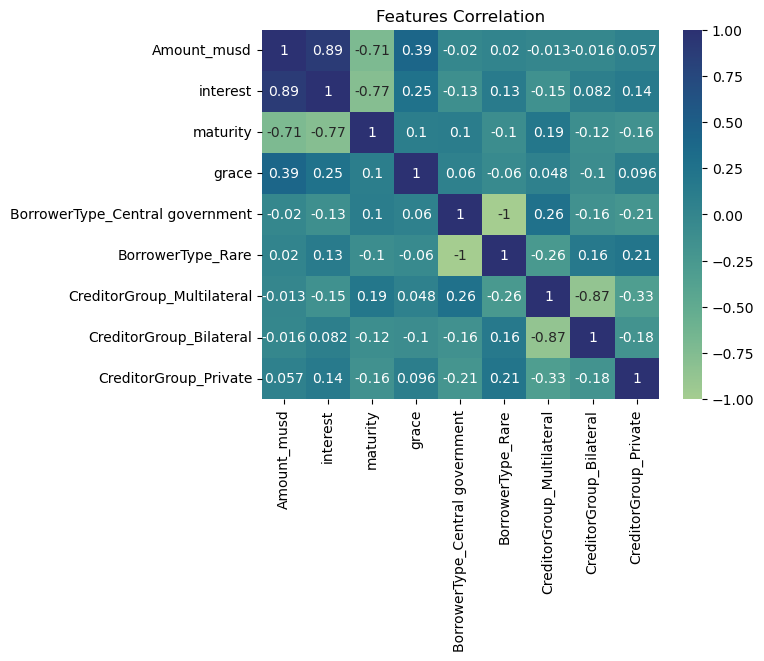

In [17]:
# Visualizing the correlation matrix after preprocessing
# plt.figure(figsize=(10, 8))
sns.heatmap(data_transformed.corr(), cmap='crest', annot=True, center=0)
plt.title('Features Correlation')
plt.show()

### Regression analysis with statsmodels.api : Model 1

In [23]:
# Split into target and feature variables
X = data_transformed.drop(['Amount_musd'], axis=1)
y = data_transformed['Amount_musd']

# Set constant term for the intercept
X1 = sm.add_constant(X)
model1 = sm.OLS(y,X1).fit()

# Print the summary of the model
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            Amount_musd   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     7909.
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:40:18   Log-Likelihood:                -56387.
No. Observations:                7500   AIC:                         1.128e+05
Df Residuals:                    7493   BIC:                         1.128e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X_vif = X.copy()
calc_vif(X_vif)

C:\Users\adesa\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,interest,3.519784
1,maturity,3.352273
2,grace,1.442668
3,BorrowerType_Central government,inf
4,BorrowerType_Rare,inf
5,CreditorGroup_Multilateral,inf
6,CreditorGroup_Bilateral,inf
7,CreditorGroup_Private,inf


In [25]:
# Dropping correlated predictive features to reduce multicolinearity

X.drop(['BorrowerType_Rare'], axis=1, inplace=True)
X.drop(['CreditorGroup_Multilateral'], axis=1, inplace=True)

In [26]:
X_vif = X.copy()
calc_vif(X_vif)

,variables,VIF
0,interest,3.400719
1,maturity,11.870655
2,grace,8.121115
3,BorrowerType_Central government,9.940861
4,CreditorGroup_Bilateral,1.473448
5,CreditorGroup_Private,1.125581


### Model 2

In [27]:
X2 = sm.add_constant(X)
model2 = sm.OLS(y,X2).fit()

model2.params

const                             -401.993353
interest                           268.764173
maturity                           -25.454365
grace                               85.874203
BorrowerType_Central government    223.005888
CreditorGroup_Bilateral           -226.152075
CreditorGroup_Private             -538.977241
dtype: float64

In [28]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            Amount_musd   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     7909.
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:40:18   Log-Likelihood:                -56387.
No. Observations:                7500   AIC:                         1.128e+05
Df Residuals:                    7493   BIC:                         1.128e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Report Summary

#### Significance of Variables
Statistically, a Variable is considered significant if its p-value is less than 5% (0.05) and its confidence interval is greater than 95%. 
From this model, all predictive features have statistically significant p-values (< 0.0001).

#### Model Fit
The R-squared value of 0.864 indicates that approximately 86.4% of the variance in the amount of debt taken by African countries is explained by the independent variables in the model even though the majority of the independent variables are statistically significant.
In conclusion, an 86.4% score is suggestive of a relatively high goodness-of-fit.

#### Impact Assessment
Variable "Interest" has the greatest impact on the amount of debt, with the highest coefficient at 268.7642.

#### F-statistic
The F-statistic value (at 7909) of this model is very high, indicating a strong relationship between the dependent variable (Amount_musd) and the independent variables. Also, with its associated p-value very close to zero, the null hypothesis can be rejected as the model is statistically significant overall.

#### Multicollinearity
The VIF table above gives an insight into the Multicolinearity level in the model1, with VIF infinity values suggestive of Structural or Data-related Multicolinearity.

Potential effects of multicollinearity include:
- Fluctuation in estimation of coefficients due to its instability
- Difficulty interpreting the individual effect of the correlated predictive features on the target.
